<a href="https://colab.research.google.com/github/prakhar-chaurasiya/final_project_nism/blob/main/combined.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# order data

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import tensorflow as tf
np.set_printoptions(suppress=True)
stock = 'sbin'

order_file = f'/content/drive/MyDrive/Colab Notebooks/FA/HIGHFREQ-DATA/highfreq/{stock}.order'
order_df = pd.read_csv(order_file, sep='|', header=None)
order_df.columns =['session', 'orderid', 'side', 'action', 'order_time', 'price', 'fquant', 'dquant', 'market', 'ioc', 'stoploss', 'triggerprice']
jiffy = 65536
ist = 330*60 # this is to be added in local machine (5:30 = 330*60 sec)
order_df['time'] = order_df['order_time'].apply(lambda x: datetime.fromtimestamp(x/jiffy))#.strftime('%Y-%m-%d %H:%M:%S'))
# order_df['min'] = order_df['order_time'].apply(lambda x: datetime.fromtimestamp(x/jiffy).strftime('%H:%M:%S'))
# order_df['sec'] = pd.to_datetime(order_df['time']).dt.strftime("%H%M%S").astype('int')
order_df['min'] = pd.to_datetime(order_df['time']).dt.strftime("%H%M").astype('int')
order_df['market_num'] = pd.get_dummies(order_df['market'], drop_first=True)

def normalize_data(x : np.array) -> np.array:
  return (x - x.min(axis=0))/(x.max(axis=0) - x.min(axis=0))

def standardize_data(x : np.array) -> np.array:
  return (x - x.mean(axis=0))/x.std(axis=0)

timeframe = 'min'
allsides = order_df[['side', timeframe, 'price', 'fquant', 'action', 'market_num']].values

trading_time = []
for i in range(9, 16):
  if i in range(10, 15):
    for j in range(0, 60):
      trading_time.append(i*100+j)
  elif i == 9:
    for j in range(15, 60):
      trading_time.append(i*100+j)
  else:
    for j in range(0, 30):
      trading_time.append(i*100+j)

## Buy

In [2]:
buy = allsides[allsides[:, 0] == 'B'][:, 1:]
buy_tf = tf.convert_to_tensor(buy, dtype=tf.int32)

buy_train = list()
b = 0
for i in trading_time:
  temp = buy_tf[buy_tf[:, 0]==i][:, 1:]
  x = np.zeros((50000, 4))
  # print(i) 
  x[:temp.shape[0]] = standardize_data(temp.numpy())
  if i != 915:
    b = np.vstack((b, x))
    
  else:
    b = x
  buy_train.append(x)
b

array([[-0.06377079, -0.55164953, -1.45981454, -0.20329746],
       [-0.0606409 , -0.64082461, -1.45981454, -0.20329746],
       [-0.05255536, -0.47258096, -1.45981454, -0.20329746],
       ...,
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

### r

In [ ]:
b.reshape(-1, 50000, 4)

array([[[ 0.17651882, -0.51345483, -2.0278076 , -0.15562812],
        [ 0.16347119, -0.51345483, -2.0278076 , -0.15562812],
        [ 0.14716164, -0.51345483, -2.0278076 , -0.15562812],
        ...,
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ]],

       [[ 0.10337096,  0.36029564,  0.59228019, -0.1502324 ],
        [ 0.13395803, -0.71861854,  0.59228019, -0.1502324 ],
        [ 0.11395879, -0.42397531,  0.59228019, -0.1502324 ],
        ...,
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ]]])

In [ ]:
c = np.stack((buy_train[0], buy_train[1])).shape


(2, 50000, 4)

In [ ]:
buy_train[-1]

array([[ 0.10337096,  0.36029564,  0.59228019, -0.1502324 ],
       [ 0.13395803, -0.71861854,  0.59228019, -0.1502324 ],
       [ 0.11395879, -0.42397531,  0.59228019, -0.1502324 ],
       ...,
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

In [ ]:
for i in buy_train:
  b = np.stack

In [ ]:
len(buy_train)

375

In [ ]:
buy_train = np.asarray(buy_train)
buy_train

In [ ]:
buy_tf[buy_tf[:, 0]==1300][:, 1:]

<tf.Tensor: shape=(25002, 4), dtype=int32, numpy=
array([[203905,      3,      1,      0],
       [203895,   1206,      3,      0],
       [203845,   1159,      3,      0],
       ...,
       [203780,    204,      3,      0],
       [203375,      2,      4,      0],
       [203780,    204,      1,      0]], dtype=int32)>

In [ ]:
z = np.zeros((30000, 4)) 
z = buy_tf[buy_tf[:, 0]==i][:, 1:]
z

<tf.Tensor: shape=(2756, 4), dtype=int32, numpy=
array([[205345,    131,      1,      0],
       [205345,    141,      1,      0],
       [205345,     71,      1,      0],
       ...,
       [205245,     10,      4,      0],
       [     0,     20,      1,      1],
       [     0,      1,      1,      1]], dtype=int32)>

In [ ]:
x = np.zeros((30000, 4)) 
x[:z.shape[0]] = z

In [ ]:
x

array([[205345.,    131.,      1.,      0.],
       [205345.,    141.,      1.,      0.],
       [205345.,     71.,      1.,      0.],
       ...,
       [     0.,      0.,      0.,      0.],
       [     0.,      0.,      0.,      0.],
       [     0.,      0.,      0.,      0.]])

In [ ]:
np.pad(z.numpy(), 30000-z.shape[0])

In [ ]:
buy_train[0].ravel().reshape(-1, 4)

array([[ 0.17651882, -0.51345483, -2.0278076 , -0.15562812],
       [ 0.16347119, -0.51345483, -2.0278076 , -0.15562812],
       [ 0.14716164, -0.51345483, -2.0278076 , -0.15562812],
       ...,
       [ 0.18010692, -0.35890328, -0.31955649, -0.15562812],
       [ 0.18010692, -0.34981201, -2.0278076 , -0.15562812],
       [ 0.17325691, -0.51042441,  0.53456906, -0.15562812]])

In [ ]:
buy_tf[buy_tf[:, 0]==1500][:, 1:]

In [ ]:
standardize_data(temp.numpy()).tolist()

array([[ 0.25780876, -0.38966533, -2.01977826, -0.24160243],
       [ 0.25780876, -0.36918983, -2.01977826, -0.24160243],
       [ 0.25780876, -0.51251836, -2.01977826, -0.24160243],
       ...,
       [ 0.25566969, -0.63741893,  0.56809198, -0.24160243],
       [-4.13466635, -0.61694343, -2.01977826,  4.13903116],
       [-4.13466635, -0.65584689, -2.01977826,  4.13903116]])

In [ ]:
def data_generator(thislist):
  for data in thislist:
    yield data

In [ ]:
next(data_generator(buy_train))

array([[ 0.17651882, -0.51345483, -2.0278076 , -0.15562812],
       [ 0.16347119, -0.51345483, -2.0278076 , -0.15562812],
       [ 0.14716164, -0.51345483, -2.0278076 , -0.15562812],
       ...,
       [ 0.18010692, -0.35890328, -0.31955649, -0.15562812],
       [ 0.18010692, -0.34981201, -2.0278076 , -0.15562812],
       [ 0.17325691, -0.51042441,  0.53456906, -0.15562812]])

In [ ]:
def data_generator():
    while True:
        length = np.random.randint(2, 10) #Variable length sequences
        x_train = np.random.random((1, length, 2)) #batch, seq, features
        y_train = np.random.random((1,1)) #batch, score
        yield x_train, y_train

In [ ]:
tf.stack([temp, buy_tf[buy_tf[:, 0]==1500][:, 1:]], axis=1)

InvalidArgumentError: ignored

In [ ]:
temp

<tf.Tensor: shape=(2756, 4), dtype=int32, numpy=
array([[205345,    131,      1,      0],
       [205345,    141,      1,      0],
       [205345,     71,      1,      0],
       ...,
       [205245,     10,      4,      0],
       [     0,     20,      1,      1],
       [     0,      1,      1,      1]], dtype=int32)>

In [ ]:
a = [0]
b = [0, 1, 1]
c = [0, 1] 
np.array([a, b, c])

<ipython-input-41-136b13c9110d>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([a, b, c])


array([list([0]), list([0, 1, 1]), list([0, 1])], dtype=object)

In [ ]:
buy_train.ravel()

In [ ]:
list(map(lambda x: x.shape[0], buy_train))

## Sell

In [3]:
sell = allsides[allsides[:, 0] == 'S'][:, 1:]
sell_tf = tf.convert_to_tensor(sell, dtype=tf.int32)

sell_train = list()
s = 0
for i in trading_time:
  temp = sell_tf[sell_tf[:, 0]==i][:, 1:]
  x = np.zeros((50000, 4))
  # print(i) 
  x[:temp.shape[0]] = standardize_data(temp.numpy())
  if i != 915:
    s = np.vstack((s, x))
  else:
    s = x
  sell_train.append(x)
s

array([[-0.04892266, -0.99540861, -1.40304264, -0.11168795],
       [-0.05089866, -1.11888468, -1.40304264, -0.11168795],
       [-0.050734  , -1.11888468, -1.40304264, -0.11168795],
       ...,
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

## r2

In [ ]:
s.reshape(-1, 120000, 4)

In [ ]:
sell_train = np.asarray(sell_train)
sell_train

In [10]:
# sell_train = list()
# for i in trading_time:
#   temp = sell_tf[sell_tf[:, 0]==i][:, 1:]
#   sell_train.append(standardize_data(temp.numpy()))
# sell_train

In [ ]:
list(map(lambda x: x.shape[0], sell_train))

# trade data

In [4]:
trade_file = f'/content/drive/MyDrive/Colab Notebooks/FA/HIGHFREQ-DATA/trade_data/{stock.upper()}.trade'
trade_df = pd.read_csv(trade_file, sep='|', header=None)
trade_df.columns =['record', 'segment', 'trade_no', 
                    'trade_time', 'series', 'trade_price', 
                    'trade_qty', 'buy_order_no', 'buy_algo', 
                    'client', 'sell_order_no', 'sell_algo']
jiffy = 65536
ist = 330*60 # this is to be added in local machine (5:30 = 330*60 sec)
trade_df['time'] = trade_df['trade_time'].apply(lambda x: datetime.fromtimestamp(x/jiffy))#.strftime('%Y-%m-%d %H:%M:%S'))
# trade_df['min'] = trade_df['trade_time'].apply(lambda x: datetime.fromtimestamp(x/jiffy-ist).strftime('%H:%M:%S'))
# trade_df['sec'] = pd.to_datetime(trade_df['time']).dt.strftime('%H%M%S').astype('int')
trade_df['trade_price'] = trade_df['trade_price']/100 
trade_df['min'] = pd.to_datetime(trade_df['time']).dt.strftime('%H%M').astype('int')
trade_df['price_*_qty'] = trade_df['trade_qty'] * trade_df['trade_price']


timeframe = 'min'
trade_np = trade_df[[timeframe, 'price_*_qty', 'trade_qty']].values
rows, row_idx = np.unique(trade_np[:, 0], return_index=True)
wpvtt = np.zeros((rows.shape[0], 4), dtype=np.float32)
for i, (r, id1, id2) in enumerate(zip(rows, row_idx, row_idx[1:])):
    wpvtt[i, 0] = r
    wpvtt[i, 1] = trade_np[id1:id2, 1:2].T.sum()/trade_np[id1:id2, 2:].T.sum()
    wpvtt[i, 2] = trade_np[id1:id2, 2:].T.sum()
    wpvtt[i, 3] = trade_np[id1:id2, 2:].shape[0]

temp = trade_df.groupby(timeframe).get_group(trade_df[timeframe].unique()[-1])[['trade_qty', 'price_*_qty']].sum()
wpvtt[-1, 0] = trade_df[timeframe].unique()[-1]
wpvtt[-1, 1] = temp[1]/temp[0]
wpvtt[-1, 2] = temp[0]
wpvtt[-1, 3] = trade_df.groupby(timeframe).get_group(trade_df[timeframe].unique()[-1])[['trade_qty', 'price_*_qty']].shape[0]
wpvtt


train = pd.DataFrame(wpvtt)
train[4] = train[1].pct_change()
train.dropna(inplace=True)
# (train[4] == 0).sum()
train['ch'] = 0
train['ch'][train[4]>0] = 1
# train['ch'][train[4]<0] = -1
train['ch']

t = train[[0, 'ch']].dropna()
trade_train = t['ch'][t[0]<1541][1:].values

<ipython-input-4-48406b84b9e8>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['ch'][train[4]>0] = 1


In [ ]:
trade_train = list()
for i in trading_time:
  trade_train.append(wpvtt[wpvtt[:, 0] == i][:, 1][0])
# trade_train 

In [ ]:
trade_train = np.array(trade_train)

## r3

In [13]:
t1 = trade_df.groupby('min').get_group(917)
t1['price_*_qty'].sum()/t1['trade_qty'].sum()

299.01177289907145

In [ ]:
for i in wpvtt:
  print(i[0], i[1])

In [ ]:
trade_train.reshape(375, 1, 1)

# model

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Model, Input
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Flatten, Reshape, TimeDistributed, \
Conv2D, MaxPooling2D, Conv1D, MaxPooling1D, concatenate
from tensorflow.keras.optimizers import Adam

## Price Prediction

In [ ]:
#--------------- in this one we predict directly the prices------------------ 
inputA = Input(shape=(50000, 4), name='buy')
inputB = Input(shape=(50000, 4), name='sell')

buy = Conv1D(64, 3, activation="relu")(inputA)
buy = MaxPooling1D(pool_size=2)(buy)
buy = Conv1D(64, 3, activation="relu")(buy)
buy = MaxPooling1D(pool_size=2)(buy)
buy = Conv1D(64, 3, activation="relu")(buy)
buy = MaxPooling1D(pool_size=2)(buy)
buy = Model(inputs=inputA, outputs=buy)

sell = Conv1D(64, 3, activation="relu")(inputB)
sell = MaxPooling1D(pool_size=2)(sell)
sell = Conv1D(64, 3, activation="relu")(sell)
sell = MaxPooling1D(pool_size=2)(sell)
sell = Conv1D(64, 3, activation="relu")(sell)
sell = MaxPooling1D(pool_size=2)(sell)
sell = Model(inputs=inputB, outputs=sell)

combined = concatenate([buy.output, sell.output])

final = LSTM(128, return_sequences=True)(combined)
final = LSTM(128, return_sequences=True)(final)
final = LSTM(128, return_sequences=False)(final)
final = Dense(128, activation=tf.keras.activations.tanh)(final)
# final = Dense(128, activation="relu")(final)
final = Dense(128, activation=tf.keras.activations.tanh)(final)
final = Dense(128, activation=tf.keras.activations.tanh)(final)
final = Dense(1, name='final')(final)

model = Model(inputs=[buy.input, sell.input], outputs=final)

In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 buy (InputLayer)               [(None, 50000, 4)]   0           []                               
                                                                                                  
 sell (InputLayer)              [(None, 50000, 4)]   0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 49998, 64)    832         ['buy[0][0]']                    
                                                                                                  
 conv1d_3 (Conv1D)              (None, 49998, 64)    832         ['sell[0][0]']                   
                                                                                            

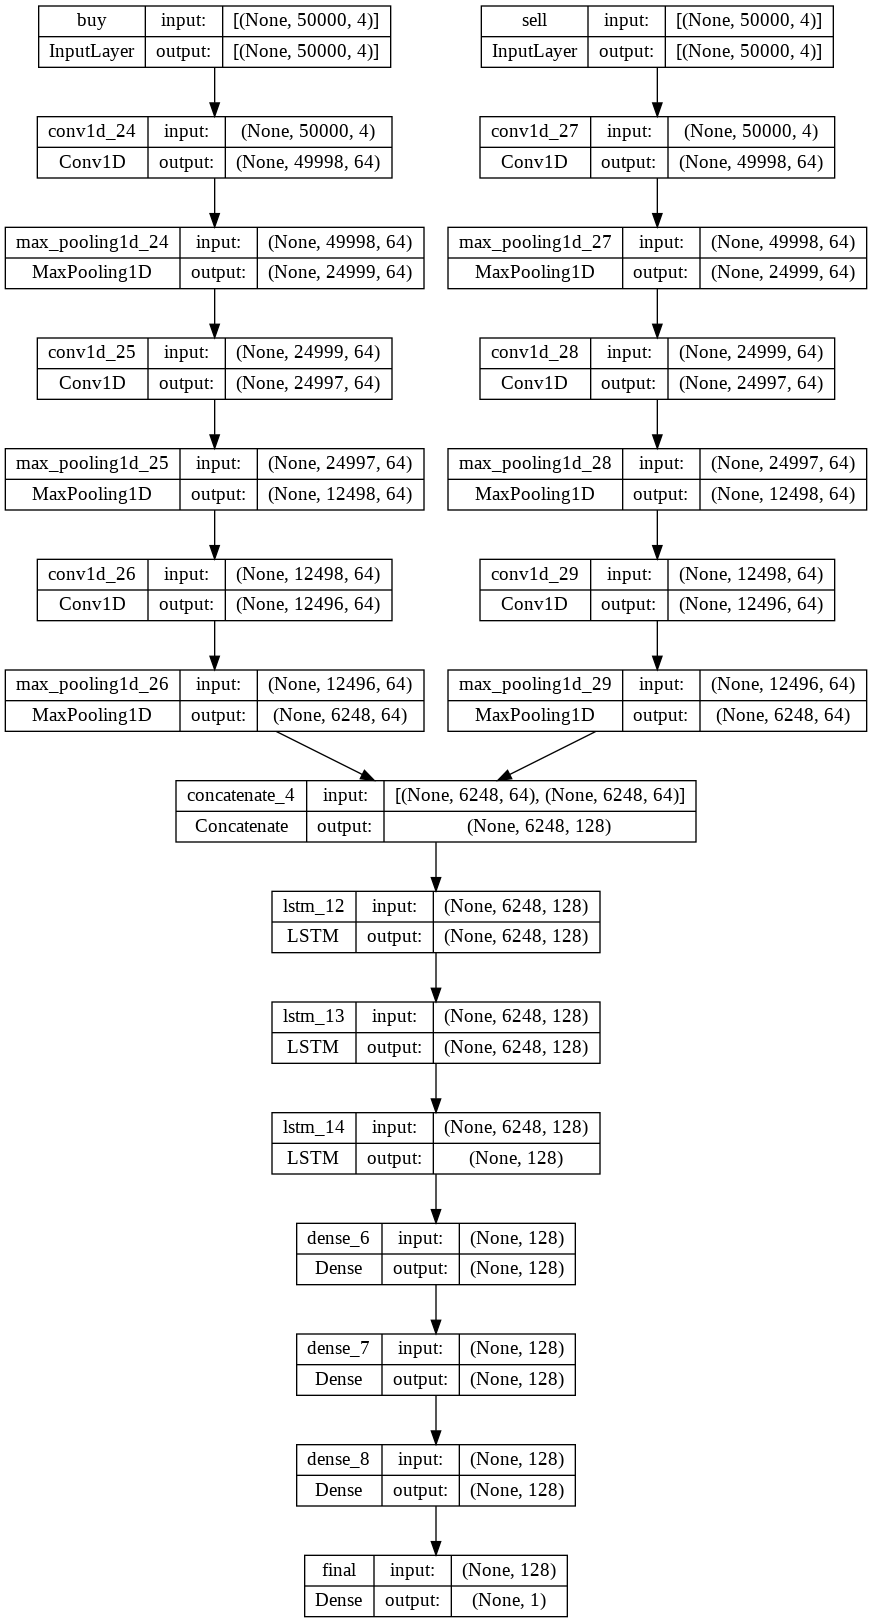

In [ ]:
keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

In [ ]:
opt = Adam(learning_rate=1e-3, decay=1e-3 / 200)
# model.compile(loss="mean_absolute_percentage_error", optimizer=opt)
model.compile(loss="mse", optimizer=opt)

In [ ]:
# history = model.fit(x={"buy": b.reshape(-1, 50000, 4), "sell": s.reshape(-1, 50000, 4)}, y={"final": trade_train}, epochs=10)
history = model.fit(x=[b.reshape(-1, 50000, 4), s.reshape(-1, 50000, 4)], y=trade_train, epochs=10)

Epoch 1/10
12/12 [==============================] - 16s 982ms/step - loss: 0.2032
Epoch 2/10
12/12 [==============================] - 12s 991ms/step - loss: 0.2065
Epoch 3/10
12/12 [==============================] - 12s 984ms/step - loss: 0.2012
Epoch 4/10
12/12 [==============================] - 12s 990ms/step - loss: 0.1958
Epoch 5/10
12/12 [==============================] - 13s 1s/step - loss: 0.1979
Epoch 6/10
12/12 [==============================] - 12s 992ms/step - loss: 0.1944
Epoch 7/10
12/12 [==============================] - 12s 986ms/step - loss: 0.1945
Epoch 8/10
12/12 [==============================] - 12s 985ms/step - loss: 0.1947
Epoch 9/10
12/12 [==============================] - 12s 984ms/step - loss: 0.1954
Epoch 10/10
12/12 [==============================] - 12s 978ms/step - loss: 0.1943


In [ ]:
b.reshape(-1, 50000, 4)[0].reshape(1, 50000, 4)

(50000, 4)

In [ ]:
model.predict({'buy':b.reshape(-1, 50000, 4)[0].reshape(1, 50000, 4), 'sell':s.reshape(-1, 50000, 4)[0].reshape(1, 50000, 4)})

1/1 [==============================] - 1s 1s/step


array([[30.148903]], dtype=float32)

In [ ]:
model.save('j.h5')

In [ ]:
tf.convert_to_tensor(buy_train[0])

<tf.Tensor: shape=(15858, 4), dtype=float64, numpy=
array([[ 0.17651882, -0.51345483, -2.0278076 , -0.15562812],
       [ 0.16347119, -0.51345483, -2.0278076 , -0.15562812],
       [ 0.14716164, -0.51345483, -2.0278076 , -0.15562812],
       ...,
       [ 0.18010692, -0.35890328, -0.31955649, -0.15562812],
       [ 0.18010692, -0.34981201, -2.0278076 , -0.15562812],
       [ 0.17325691, -0.51042441,  0.53456906, -0.15562812]])>

## Change Prediction

In [17]:
#--------------- in this one we predict change of prices------------------ 
inputA = Input(shape=(50000, 4), name='buy')
inputB = Input(shape=(50000, 4), name='sell')

buy = Conv1D(64, 3, activation="relu")(inputA)
buy = MaxPooling1D(pool_size=2)(buy)
buy = Dropout(0.2)(buy)
buy = Conv1D(64, 3, activation="relu")(buy)
buy = MaxPooling1D(pool_size=2)(buy)
buy = Dropout(0.2)(buy)
buy = Conv1D(64, 3, activation="relu")(buy)
buy = MaxPooling1D(pool_size=2)(buy)
buy = Dropout(0.2)(buy)
buy = Model(inputs=inputA, outputs=buy)

sell = Conv1D(64, 3, activation="relu")(inputB)
sell = MaxPooling1D(pool_size=2)(sell)
sell = Dropout(0.2)(sell)
sell = Conv1D(64, 3, activation="relu")(sell)
sell = MaxPooling1D(pool_size=2)(sell)
sell = Dropout(0.2)(sell)
sell = Conv1D(64, 3, activation="relu")(sell)
sell = MaxPooling1D(pool_size=2)(sell)
sell = Dropout(0.2)(sell)
sell = Model(inputs=inputB, outputs=sell)

combined = concatenate([buy.output, sell.output])

final = LSTM(128, return_sequences=True)(combined)
final = Dropout(0.2)(final)
final = LSTM(128, return_sequences=True)(final)
final = Dropout(0.2)(final)
final = LSTM(128, return_sequences=False)(final)
final = Dense(128, activation=tf.keras.activations.tanh)(final)
final = Dropout(0.2)(final)
# final = Dense(128, activation="relu")(final)
final = Dense(128, activation=tf.keras.activations.tanh)(final)
final = Dropout(0.2)(final)
final = Dense(128, activation=tf.keras.activations.tanh)(final)
final = Dropout(0.2)(final)
final = Dense(1, activation='sigmoid', name='final')(final)

model = Model(inputs=[buy.input, sell.input], outputs=final)

In [18]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 buy (InputLayer)               [(None, 50000, 4)]   0           []                               
                                                                                                  
 sell (InputLayer)              [(None, 50000, 4)]   0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 49998, 64)    832         ['buy[0][0]']                    
                                                                                                  
 conv1d_3 (Conv1D)              (None, 49998, 64)    832         ['sell[0][0]']                   
                                                                                            

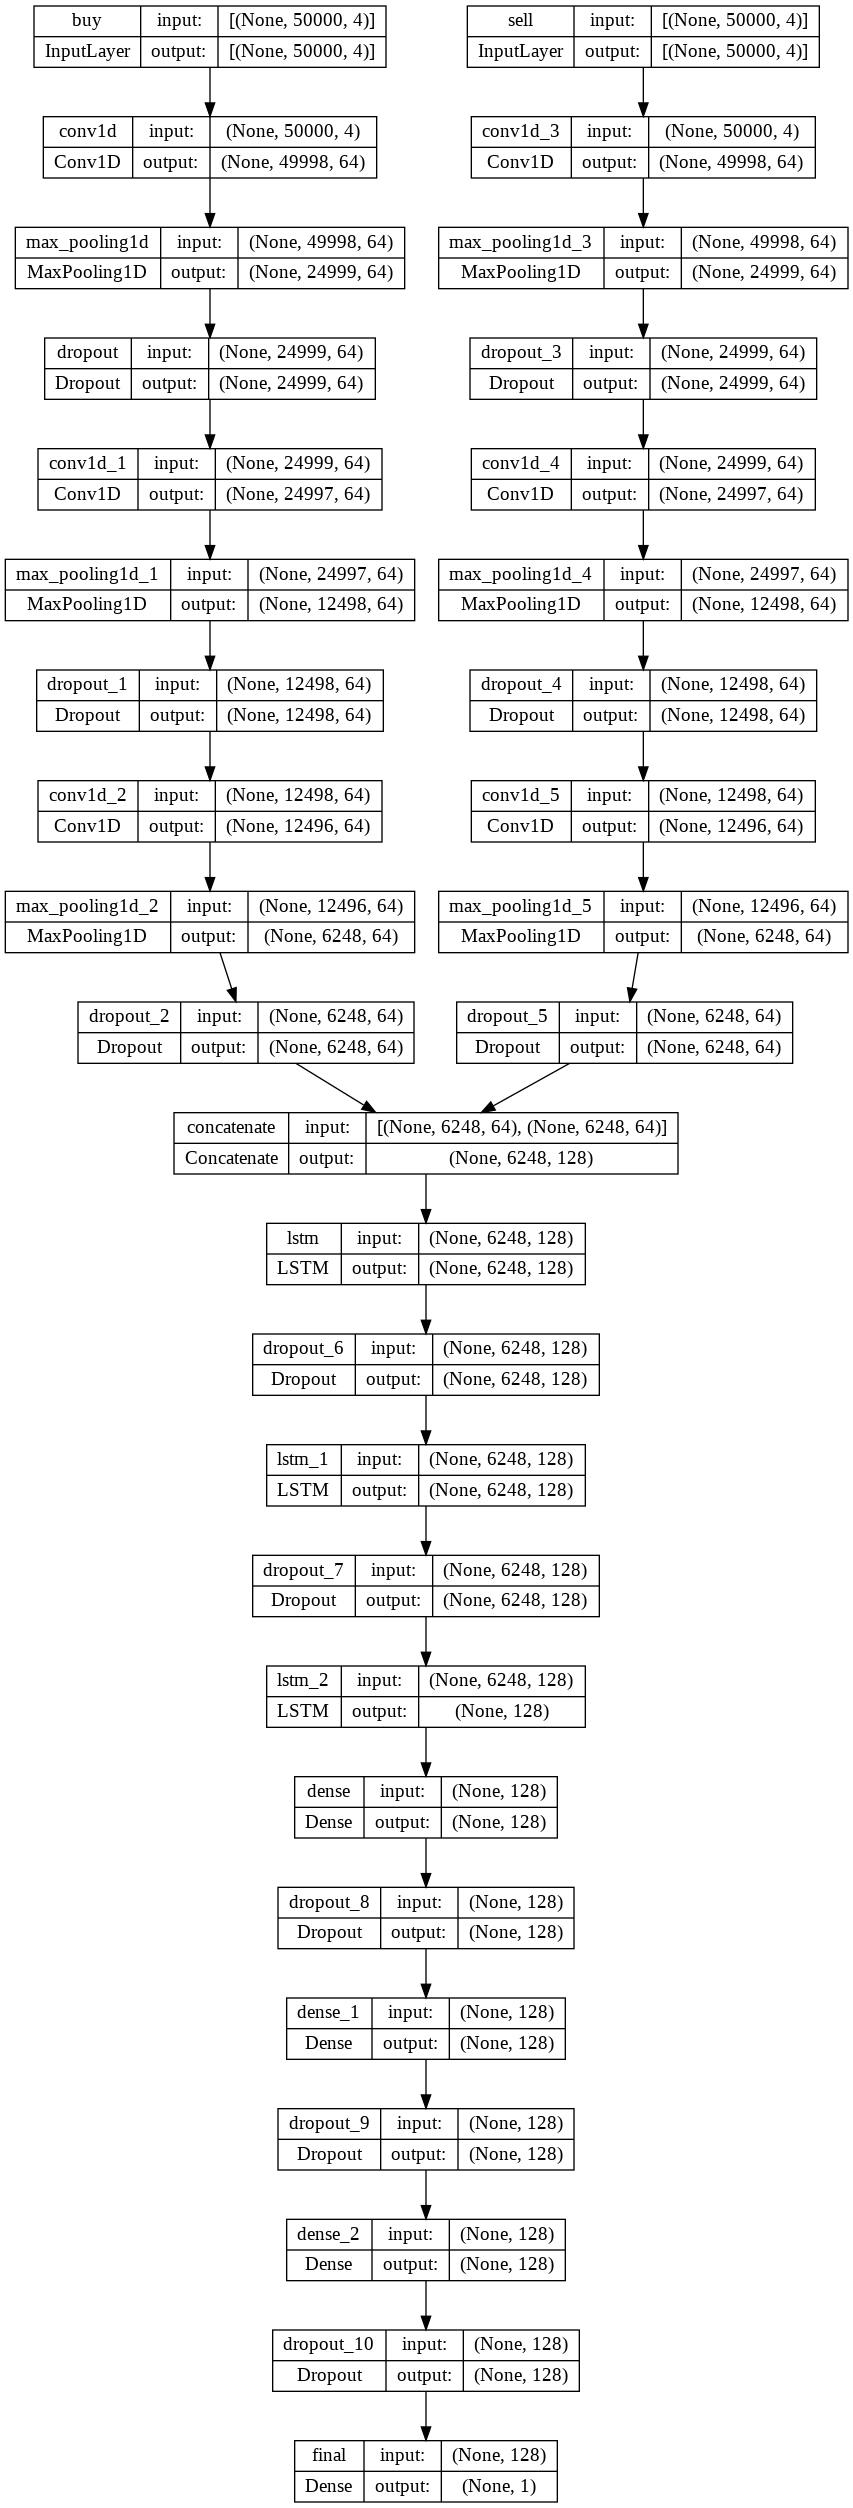

In [19]:
keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

In [20]:
opt = Adam(learning_rate=1e-3, decay=1e-3 / 200)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=['acc'])

In [21]:
history = model.fit(x=[b.reshape(-1, 50000, 4), s.reshape(-1, 50000, 4)], y=trade_train, epochs=10)

Epoch 1/10
12/12 [==============================] - 30s 1s/step - loss: 0.6955 - acc: 0.5013
Epoch 2/10
12/12 [==============================] - 12s 1s/step - loss: 0.6972 - acc: 0.4853
Epoch 3/10
12/12 [==============================] - 12s 1s/step - loss: 0.6960 - acc: 0.4933
Epoch 4/10
12/12 [==============================] - 14s 1s/step - loss: 0.6939 - acc: 0.5280
Epoch 5/10
12/12 [==============================] - 13s 1s/step - loss: 0.6945 - acc: 0.4800
Epoch 6/10
12/12 [==============================] - 12s 1s/step - loss: 0.6939 - acc: 0.4907
Epoch 7/10
12/12 [==============================] - 12s 986ms/step - loss: 0.6956 - acc: 0.4827
Epoch 8/10
12/12 [==============================] - 12s 997ms/step - loss: 0.6958 - acc: 0.5173
Epoch 9/10
12/12 [==============================] - 13s 1s/step - loss: 0.6969 - acc: 0.4667
Epoch 10/10
12/12 [==============================] - 12s 990ms/step - loss: 0.6945 - acc: 0.4827


RESULTS

Epoch 1/10
12/12 [==============================] - 30s 1s/step - loss: 0.6955 - acc: 0.5013

Epoch 2/10
12/12 [==============================] - 12s 1s/step - loss: 0.6972 - acc: 0.4853

Epoch 3/10
12/12 [==============================] - 12s 1s/step - loss: 0.6960 - acc: 0.4933

Epoch 4/10
12/12 [==============================] - 14s 1s/step - loss: 0.6939 - acc: 0.5280

Epoch 5/10
12/12 [==============================] - 13s 1s/step - loss: 0.6945 - acc: 0.4800

Epoch 6/10
12/12 [==============================] - 12s 1s/step - loss: 0.6939 - acc: 0.4907

Epoch 7/10
12/12 [==============================] - 12s 986ms/step - loss: 0.6956 - acc: 0.4827

Epoch 8/10
12/12 [==============================] - 12s 997ms/step - loss: 0.6958 - acc: 0.5173

Epoch 9/10
12/12 [==============================] - 13s 1s/step - loss: 0.6969 - acc: 0.4667

Epoch 10/10
12/12 [==============================] - 12s 990ms/step - loss: 0.6945 - acc: 0.4827



## Combined Demand And Supply

In [18]:
bs = np.stack((b.reshape(-1, 50000, 4), s.reshape(-1, 50000, 4)), axis=1)
bs.shape

(375, 2, 50000, 4)

In [6]:
bbss = np.hstack((b.reshape(-1, 50000, 4), s.reshape(-1, 50000, 4)))
bbss.shape

(375, 100000, 4)

In [7]:
#--------------- in this one we predict change of prices in one model------------------ 
model = Sequential()
model.add(Conv1D(128, 3, activation='relu', input_shape=(100000, 4)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv1D(128, 3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv1D(128, 3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(LSTM(units = 64, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 64, return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(64, activation=tf.keras.activations.tanh))
model.add(Dropout(0.2))
model.add(Dense(64, activation=tf.keras.activations.tanh))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid', name='final'))
model.summary()

# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 99998, 128)        1664      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 49999, 128)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 49999, 128)        0         
                                                                 
 conv1d_1 (Conv1D)           (None, 49997, 128)        49280     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 24998, 128)       0         
 1D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 24998, 128)        0

In [ ]:
model.summary()

In [8]:
opt = Adam(learning_rate=1e-3, decay=1e-3 / 200)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=['acc'])

In [9]:
history = model.fit(x=bbss, y=trade_train, epochs=10)

Epoch 1/10
12/12 [==============================] - 30s 1s/step - loss: 0.6945 - acc: 0.4987
Epoch 2/10
12/12 [==============================] - 15s 1s/step - loss: 0.6935 - acc: 0.4773
Epoch 3/10
12/12 [==============================] - 15s 1s/step - loss: 0.6934 - acc: 0.4640
Epoch 4/10
12/12 [==============================] - 16s 1s/step - loss: 0.6941 - acc: 0.4613
Epoch 5/10
12/12 [==============================] - 15s 1s/step - loss: 0.6926 - acc: 0.5013
Epoch 6/10
12/12 [==============================] - 17s 1s/step - loss: 0.6938 - acc: 0.5040
Epoch 7/10
12/12 [==============================] - 16s 1s/step - loss: 0.6930 - acc: 0.5013
Epoch 8/10
12/12 [==============================] - 15s 1s/step - loss: 0.6952 - acc: 0.4720
Epoch 9/10
12/12 [==============================] - 15s 1s/step - loss: 0.6959 - acc: 0.4480
Epoch 10/10
12/12 [==============================] - 16s 1s/step - loss: 0.6938 - acc: 0.4800


In [ ]:
#--------------- in this one we predict change of prices------------------ 
# inputA = Input(shape=(50000, 4), name='buy')
# inputB = Input(shape=(50000, 4), name='sell')

# buy = Conv1D(64, 3, activation="relu")(inputA)
# buy = MaxPooling1D(pool_size=2)(buy)
# buy = Conv1D(64, 3, activation="relu")(buy)
# buy = MaxPooling1D(pool_size=2)(buy)
# buy = Conv1D(64, 3, activation="relu")(buy)
# buy = MaxPooling1D(pool_size=2)(buy)
# buy = Model(inputs=inputA, outputs=buy)

# sell = Conv1D(64, 3, activation="relu")(inputB)
# sell = MaxPooling1D(pool_size=2)(sell)
# sell = Conv1D(64, 3, activation="relu")(sell)
# sell = MaxPooling1D(pool_size=2)(sell)
# sell = Conv1D(64, 3, activation="relu")(sell)
# sell = MaxPooling1D(pool_size=2)(sell)
# sell = Model(inputs=inputB, outputs=sell)

# combined = concatenate([buy.output, sell.output])

# final = LSTM(128, return_sequences=True)(combined)
# final = LSTM(128, return_sequences=True)(final)
# final = LSTM(128, return_sequences=False)(final)
# final = Dense(128, activation=tf.keras.activations.tanh)(final)
# # final = Dense(128, activation="relu")(final)
# final = Dense(128, activation=tf.keras.activations.tanh)(final)
# final = Dense(128, activation=tf.keras.activations.tanh)(final)
# final = Dense(1, activation='sigmoid', name='final')(final)

# model = Model(inputs=[buy.input, sell.input], outputs=final)